<a href="https://colab.research.google.com/github/ReshmaAlphonse/CE888-7-SP/blob/main/Lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
# from sklearn.metrics import fbeta_score, Scorer
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [6]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")
dataframe

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:

dataframe_1 = dataframe

# Check if there are any missing values in the dataset. If there are, drop the rows.
print("Number of rows before dropping NaNs: %d" % len(dataframe_1))
dataframe_1 = dataframe_1.dropna()
print("Number of rows after dropping NaNs: %d" % len(dataframe_1))

# drop duration
dataframe_1 = dataframe_1.drop(['duration'], axis=1)

# Label Encoder
dataframe_1[["y"]] = dataframe_1[["y"]].apply(LabelEncoder().fit_transform)

a = [name for name in dataframe_1.columns if dataframe_1[name].dtype == 'object']
print (a)

b = [name for name in dataframe_1.columns if dataframe_1[name].dtype != 'object']
print (b)

Number of rows before dropping NaNs: 41188
Number of rows after dropping NaNs: 41188
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


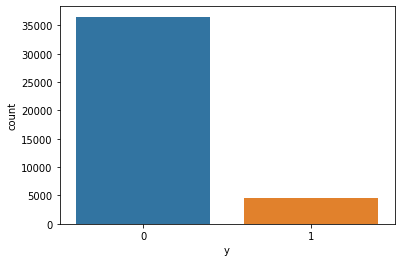

0    0.887346
1    0.112654
Name: y, dtype: float64


In [8]:
sns.countplot(x='y',data=dataframe_1)
plt.show()

print(dataframe_1.y.value_counts(normalize=True))

In [9]:
data_1 = dataframe_1[a]
data_dummies = pd.get_dummies(data_1)
X_dataframe = pd.concat([data_dummies, dataframe_1[b]], axis=1)

features = ['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 
       'marital_divorced', 'marital_married', 'marital_single',
        'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_no',
        'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'age','campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

X_dataframe =  X_dataframe[features]
y_dataframe = dataframe_1['y']


In [10]:
X = X_dataframe
y = y_dataframe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
display('check the shape of splitted train and test sets', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

'check the shape of splitted train and test sets'

(32950, 56)

(32950,)

(8238, 56)

(8238,)

In [11]:

clf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=50)
clf.fit(X_train, y_train)

scores = cross_val_score(clf, X, y, cv=10,scoring=make_scorer(f1_score))

dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)

dummy_scores = cross_val_score(dummy_clf, X, y, cv=10, scoring=make_scorer(f1_score))


print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f +/- %0.2f" % (dummy_scores.mean(), dummy_scores.std()))

ACC: 0.03 +/- 0.07
Dummy ACC: 0.11 +/- 0.01


In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 300],
    'max_features':['auto', 'sqrt', 'log2']
}
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)

CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_features': 'auto', 'n_estimators': 300}


In [13]:

clf = RandomForestClassifier(n_estimators=400, max_features='auto', random_state=60,max_depth=6)

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = make_scorer(f1_score))
print(scores.mean())
print(scores)
clf.fit(X_train, y_train)
from sklearn import metrics
y_pred = clf.predict(X)
print('f1_score:', metrics.f1_score(y, y_pred))

0.28432228322326397
[0.25596529 0.31330472 0.23059867 0.28695652 0.23684211 0.30967742
 0.39837398 0.25494505 0.27510917 0.28144989]
f1_score: 0.29571183533447687


[55 54 49 46 51 53 52 50 47 34 45 37 27 28 44 35 29 48 21 33 40 38  8  1
 20  5 31 41 39 13 42 32 36 17 30 43 19 16 23  9 24 12  0 25  7 14 26 11
  6 15 10  4  2  3 18 22]
Feature ranking:
1. nr.employed (0.201400)
2. euribor3m (0.170040)
3. pdays (0.109688)
4. poutcome_success (0.109606)
5. emp.var.rate (0.075764)
6. cons.conf.idx (0.069976)
7. cons.price.idx (0.057011)
8. previous (0.022958)
9. age (0.022713)
10. month_mar (0.017145)
11. poutcome_nonexistent (0.015561)
12. month_oct (0.014114)
13. contact_cellular (0.013828)
14. contact_telephone (0.012421)
15. poutcome_failure (0.011980)
16. month_may (0.009959)
17. month_apr (0.007304)
18. campaign (0.004808)
19. default_no (0.004368)
20. month_jun (0.004025)
21. day_of_week_mon (0.003807)
22. month_sep (0.003636)
23. job_student (0.003007)
24. job_blue-collar (0.002952)
25. education_university.degree (0.002080)
26. job_retired (0.001941)
27. month_dec (0.001797)
28. day_of_week_thu (0.001514)
29. day_of_week_fri (0.001474)
30. ma

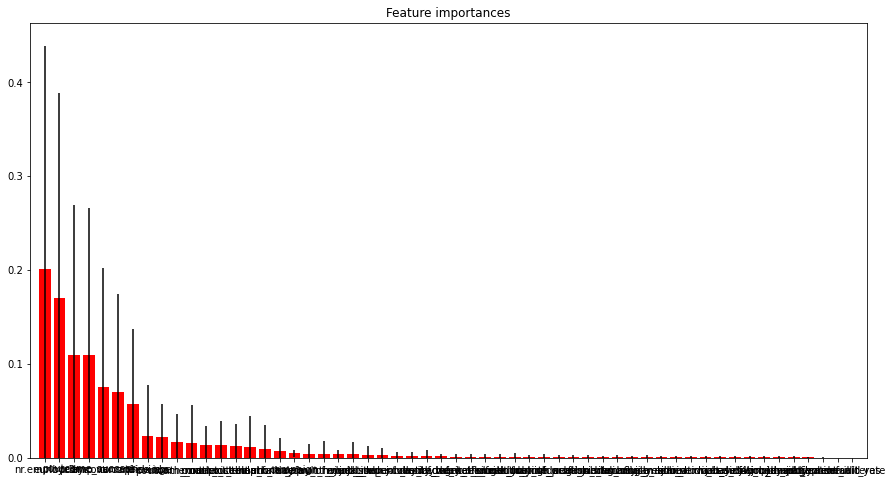

In [14]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15,8)

In [15]:
def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    conf_mat: confusion matrix
    classes: names of classes to be annotated
    normalize: [True/False] whether to normalise by column
    """
    if normalize:
        conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
        t = "(%.2f)" % (conf_mat[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[7210  100]
 [ 724  204]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.67      0.22      0.33       928

    accuracy                           0.90      8238
   macro avg       0.79      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238

0.8999757222626851
Normalized confusion matrix


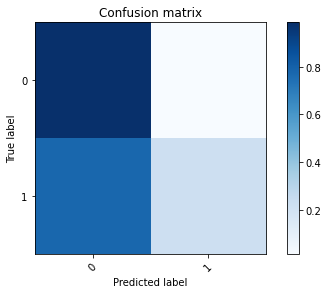

In [16]:

# Compute confusion matrix
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, random_state=60,max_depth=8)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print(confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
print(metrics.accuracy_score(y_test, y_pred))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize=True,
                      title='Confusion matrix')

#plt.savefig("confusion.pdataframe", bbox_inches='tight')